In [90]:
import soundfile
import os, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [77]:
# for visualisations 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.animation as animation

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
def extract_feature(file_name, mfcc, mel, chroma):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
    return result


In [4]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [5]:
audio_files = glob('/Users/kishorejr/Documents/SRH/Semester_3/Case_Study_2/subset_folder/Audio_Speech_Actors/Actor_*/*.wav')

In [6]:
# Play audio file
ipd.Audio(audio_files[0])

In [7]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (86081,)
sr: 22050


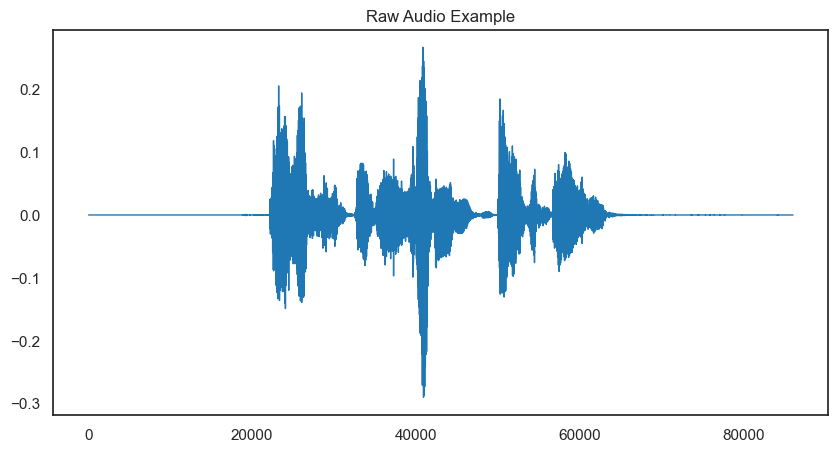

In [8]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

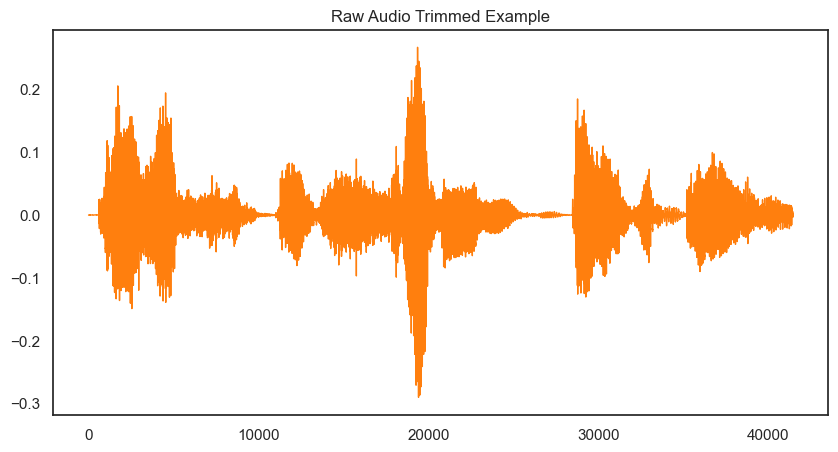

In [9]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

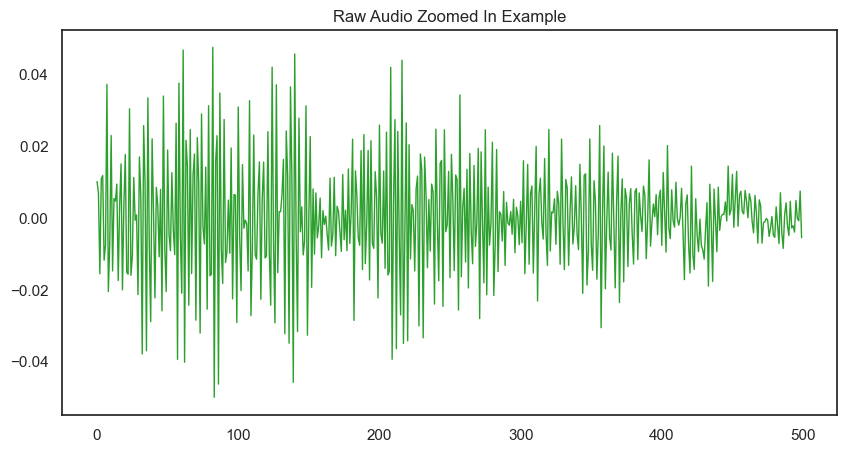

In [10]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

Spectogram

In [11]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 169)

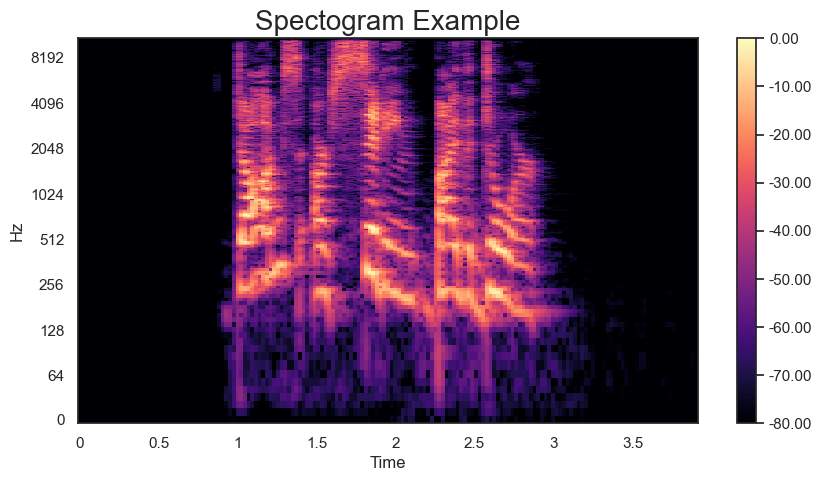

In [12]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [13]:
#Mel Spectogram
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

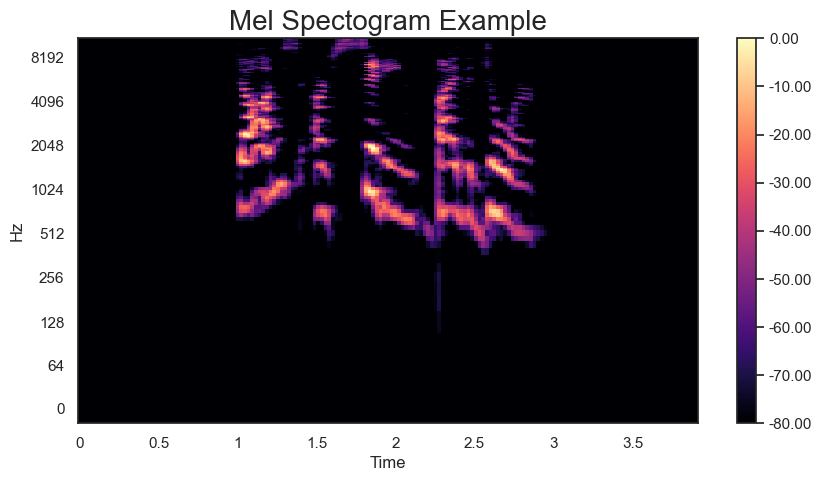

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
#mel spectogram plotting
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [15]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in audio_files:
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [16]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [17]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(498, 166)


In [18]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [223]:
#Initialize MLP Classifier 
#alpha=0.01, batch_size=128, epsilon=1e-08, hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=1000
model=MLPClassifier(alpha=0.01, batch_size=128, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=1000)

In [291]:
#Best Hyper Parameters for Model Fit - Accuracy of Model - 86.75
#alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=2000)

In [238]:
#Initialize MLP Classifier 
#alpha=0.01, batch_size=512, epsilon=1e-08, hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=1500
model=MLPClassifier(alpha=0.01, batch_size=512, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=1500)

In [281]:
#Initialize MLP Classifier 
#alpha=0.01, batch_size=1024, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=2000
model=MLPClassifier(alpha=0.01, batch_size=1024, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='adaptive', max_iter=2500)

In [293]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(500,),
              learning_rate='adaptive', max_iter=2000)

In [295]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [296]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.13%


In [297]:
# Assuming you have already trained your MLP classifier and obtained predictions
# Also assuming you have the path to the new audio sample stored in a variable called new_audio_file

# Define the path to the new audio sample
#new_audio_file = "/Users/kishorejr/Documents/SRH/Semester_3/Case_Study_2/subset_folder/Audio_Song_Actors/Actor_02/03-02-06-02-02-02-02.wav"
new_audio_file = "/Users/kishorejr/Documents/SRH/Semester_3/Case_Study_2/subset_folder/Audio_Song_Actors/Actor_23/03-02-03-01-01-02-23.wav"
# Extract features from the new audio sample
new_feature = extract_feature(new_audio_file, mfcc=True, mel=True, chroma=True)

# Reshape the feature array to match the input shape expected by the MLP classifier
new_feature = new_feature.reshape(1, -1)

# Predict the emotion using the trained MLP classifier
predicted_label = model.predict(new_feature)

# Convert the predicted label back to the original emotion using the emotions dictionary
predicted_emotion = [key for key, value in emotions.items() if value == predicted_label][0]

# Print the predicted emotion
print(f"The predicted emotion for the new audio sample is: {predicted_emotion}")

print("Predicted label value:", predicted_label)



The predicted emotion for the new audio sample is: 02
Predicted label value: ['calm']


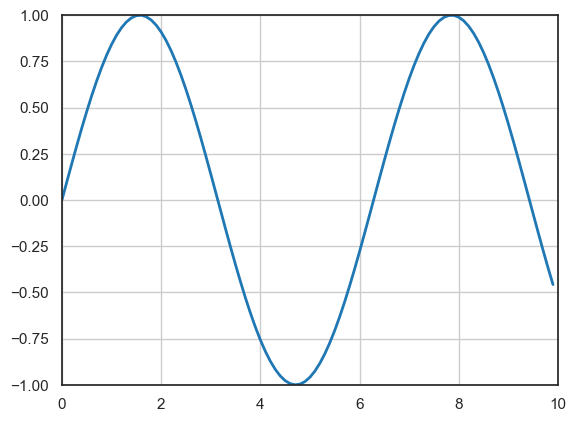

In [294]:
#Might delete later 
# Function to generate random data for demonstration
def generate_data():
    x = np.arange(0, 10, 0.1)
    y = np.sin(x)
    return x, y

# Initialize plot and line object
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set plot properties
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.grid()

# Training loop (replace this with your actual training loop)
for i in range(100):
    # Generate new data
    x, y = generate_data()
    
    # Update the plot
    line.set_data(x, y)
    
    # Pause for a short time to create the animation effect
    plt.pause(0.1)

# Show the final plot
plt.show()